In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

This section presents the core ideas of reinforcement learning algorithm in their simplest form, in which the state and action spaces are small enough for the approximate value functions to be represented as arrays or tables. In this case, the methods can often find exactly the orpimal value function and the optimal policy, which contrasts with the approximate methods, which, by name definition, find only approximate solutions but can be applied to much larger problems.

### Action-value Methods

The methods used for estimating the values of actions and for using the estimated to make action selection decisions is called *action-value method*. The true value of an action is the mean reward when that action is selected - we can thus estimate this by averaging the rewards actually received. This is a simple method called *sample-average* method, and it's one of many, not necessarily the best one. 

We can take a *greedy* step and pick the best action based on previous experiences $A_t = argmax Q_t(a)$, which encourages *exploitation* of what we know is the best action given current state, or we can *explore* and pick a different, random action with probability $\epsilon$.

We can assess the effectiveness of the greedy and $\epsilon$-greedy action-value methods with ```K_ArmedBandit``` task. For any learning method we can measure its performance and behavior as it improves with experience over 1000 time steps (one *run*) when applied to the bandit problem.

In [133]:
class K_ArmedBandit():
   def __init__(self, k, loc=0., scale=1.):
      self.k = k
      self.rewards = {}
      for lever in range(self.k):
         self.rewards[lever] = np.random.normal(loc=loc, scale=scale)
         
   def step(self, action:int):
      return np.random.normal(loc=self.rewards[action], scale=1.)
         
   def plot(self, samples=2000, figsize=(10, 8)):
      distributions = []
      for v in self.rewards.values():
         distributions.append(np.random.normal(loc=v, scale=1., size=samples))
      
      # Main plot
      plt.figure(figsize=figsize)
      plt.plot([0]*self.k, linestyle='--', color='red', linewidth=1.)
      ax = sns.violinplot(data=distributions, color='white')
    
      # Label names
      plt.xlabel('Action')
      plt.ylabel('Reward distribution')

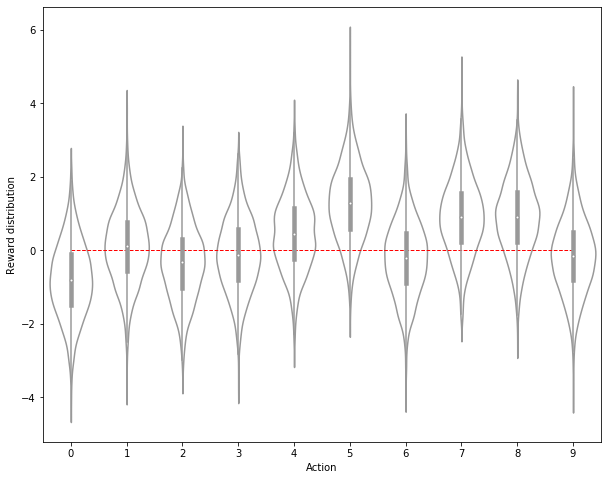

In [134]:
bandit = K_ArmedBandit(10)
bandit.plot()

In [279]:
from collections import defaultdict

class SampleAverageQTable():
   '''Simple Q-Table that store estimate reward for a given action by taking average of trials'''
   def __init__(self, action_size):
      self.Q = np.zeros(action_size)
      self.rewards_counter = np.zeros(action_size)
      self.seen_counter = np.zeros(action_size)
      
   def update(self, action, reward):
      self.rewards_counter[action] += reward
      self.seen_counter[action] += 1
      self.Q[action] = self.rewards_counter[action] / self.seen_counter[action]
      
   def __repr__(self):
      output = []
      for i, v in enumerate(self.Q):
         output.append(f'Action: {i}, Reward: {v}')
         
      return '\n'.join(output)
   
   def __getitem__(self, index):
      return self.Q[index]

   
def agent(bandit, action_size, steps=1000, eps=0.):
   '''Agent using sample-average technique'''
   Q = SampleAverageQTable(action_size)
   expected_rewards = []
   
   for step in range(steps):
      # Pick epsilon-greedy action
      if np.random.uniform() < eps:
         action = np.random.randint(0, 10)
      else:
         action = np.argmax(Q.Q)

      # Get and record reward
      reward = bandit.step(action)
      Q.update(action, reward)
      expected_rewards.append(Q[np.argmax(Q.Q)])
      
   return Q, expected_rewards

In [283]:
Q, expected_rewards = agent(bandit, action_size=10, eps=0.1)
Q, np.mean(expected_rewards)

(Action: 0, Reward: -0.19233858586671446
 Action: 1, Reward: 0.3663908841910972
 Action: 2, Reward: 0.43771827730687995
 Action: 3, Reward: 0.3014007051373748
 Action: 4, Reward: 1.0080312228383408
 Action: 5, Reward: 1.2974285217021455
 Action: 6, Reward: -0.48050936639875336
 Action: 7, Reward: 0.8866545363693099
 Action: 8, Reward: 1.0406678221423904
 Action: 9, Reward: -0.37097690412593504,
 1.3514628002392155)

In [285]:
def monte_carlo(runs, eps, k=10):
   average_results = []
   for i in range(runs):
      bandit = K_ArmedBandit(k)
      _, expected_rewards = agent(bandit, action_size=k, eps=eps)
      average_results.append(expected_rewards)
      
   return np.mean(np.array(average_results), axis=0)

In [286]:
eps_0 = monte_carlo(200, 0.0)
eps_1 = monte_carlo(200, 0.01)
eps_2 = monte_carlo(200, 0.1)

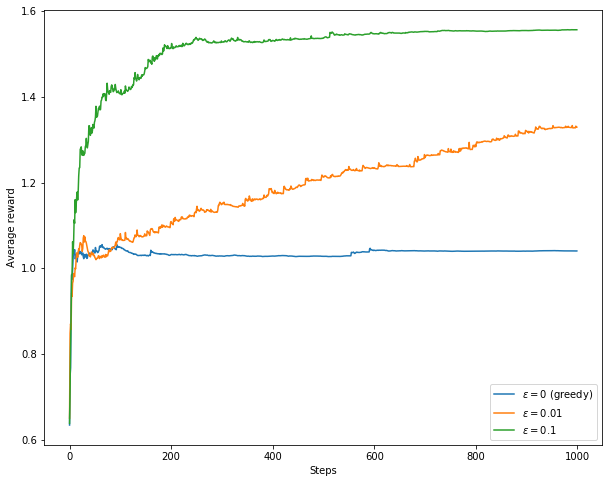

In [293]:
plt.figure(figsize=(10, 8))
plt.plot(eps_0, label=r'$\epsilon=0$ (greedy)')
plt.plot(eps_1, label=r'$\epsilon=0.01$')
plt.plot(eps_2, label=r'$\epsilon=0.1$')
plt.legend()
plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.show()

As shown in the chart, greedy method performed much worse compared to the best possible score of about 1.55 on this task - that's because it got stuck performic suboptimal actions as it didn't get to explore new possibilities. 

In [ ]:
# 53